In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Flight_Booking.csv')
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [ ]:
df.shape

(300153, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  object 
 3   departure_time    300153 non-null  object 
 4   stops             300153 non-null  object 
 5   arrival_time      300153 non-null  object 
 6   destination_city  300153 non-null  object 
 7   class             300153 non-null  object 
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
df.describe()

,duration,days_left,price
count,300153.000000,300153.000000,300153.000000
mean,12.221021,26.004751,20889.660523
std,7.191997,13.561004,22697.767366
min,0.830000,1.000000,1105.000000
25%,6.830000,15.000000,4783.000000
50%,11.250000,26.000000,7425.000000
75%,16.170000,38.000000,42521.000000
max,49.830000,49.000000,123071.000000


In [ ]:
df.isnull().sum()

,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0
days_left,0


In [ ]:
df.duplicated().sum()

np.int64(0)

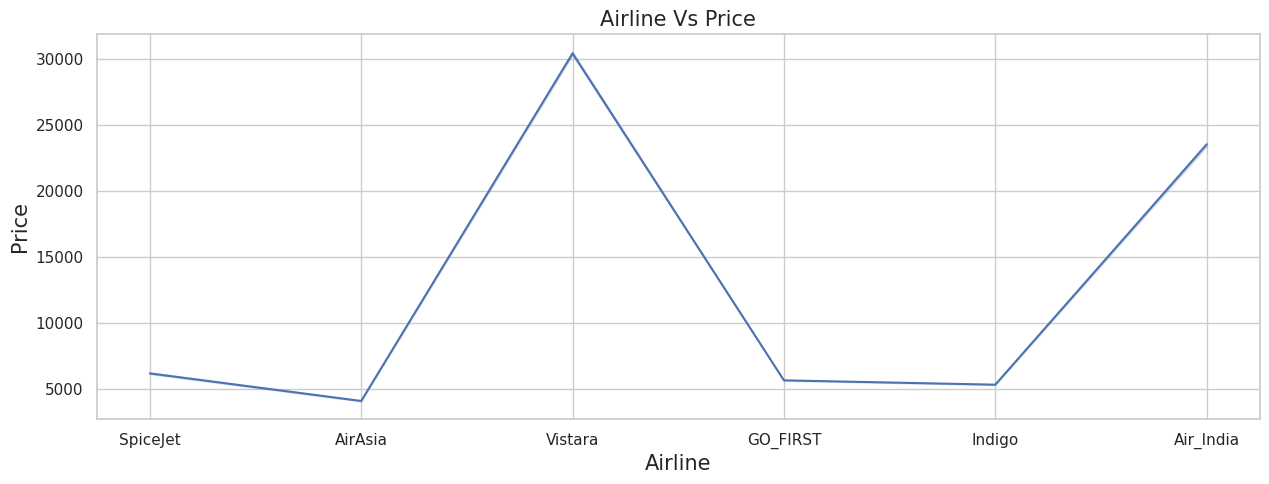

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['airline'],y=df['price'])
plt.title('Airline Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


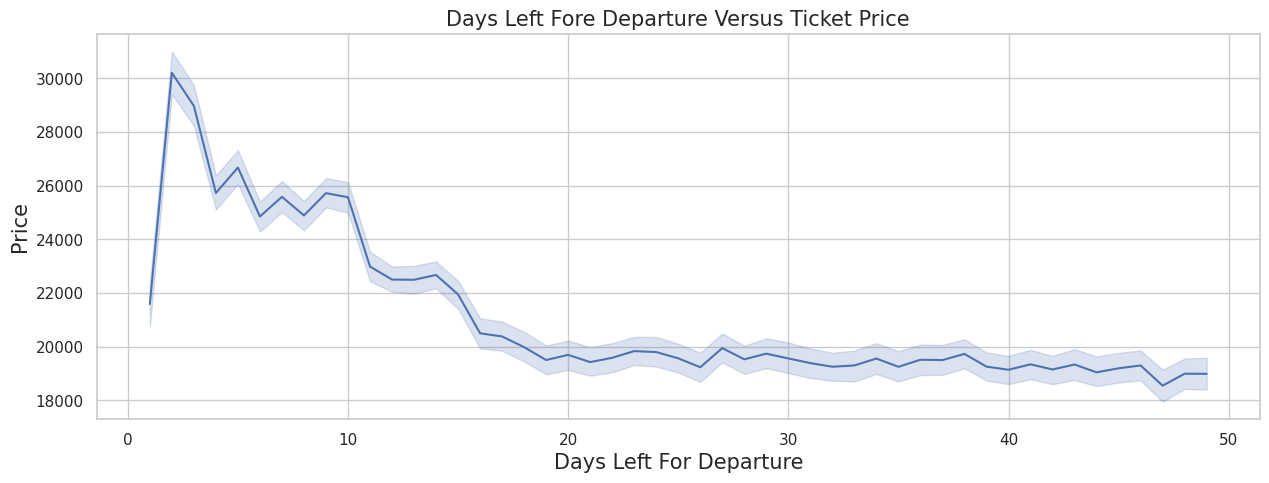

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x=df['days_left'],y=df['price'])
plt.title('Days Left Fore Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Days Left For Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

/tmp/ipython-input-3446955799.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(


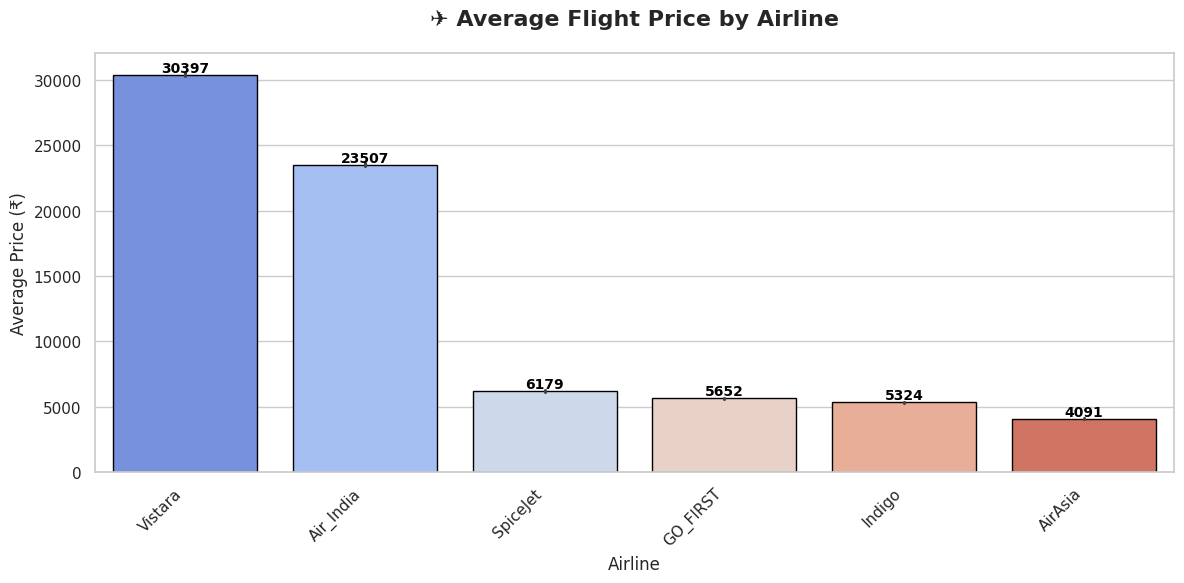

In [ ]:
plt.figure(figsize=(12,6))
sns.set_style('whitegrid')

# Sort airlines by average price (highest first)
order = df.groupby('airline')['price'].mean().sort_values(ascending=False).index

# Create the barplot
bar = sns.barplot(
    x='airline',
    y='price',
    data=df,
    estimator=np.mean,
    order=order,
    palette='coolwarm',   # try 'viridis', 'mako', 'crest', 'plasma' too
    edgecolor='black'
)

# Add title and labels
plt.title('✈️ Average Flight Price by Airline', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Airline', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for p in bar.patches:
    bar.annotate(
        f'{p.get_height():.0f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=10, color='black', fontweight='bold'
    )

# Reduce excess space and display
plt.tight_layout()
plt.show()


/tmp/ipython-input-4045114468.py:37: UserWarning: Glyph 128186 (\N{SEAT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128186 (\N{SEAT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


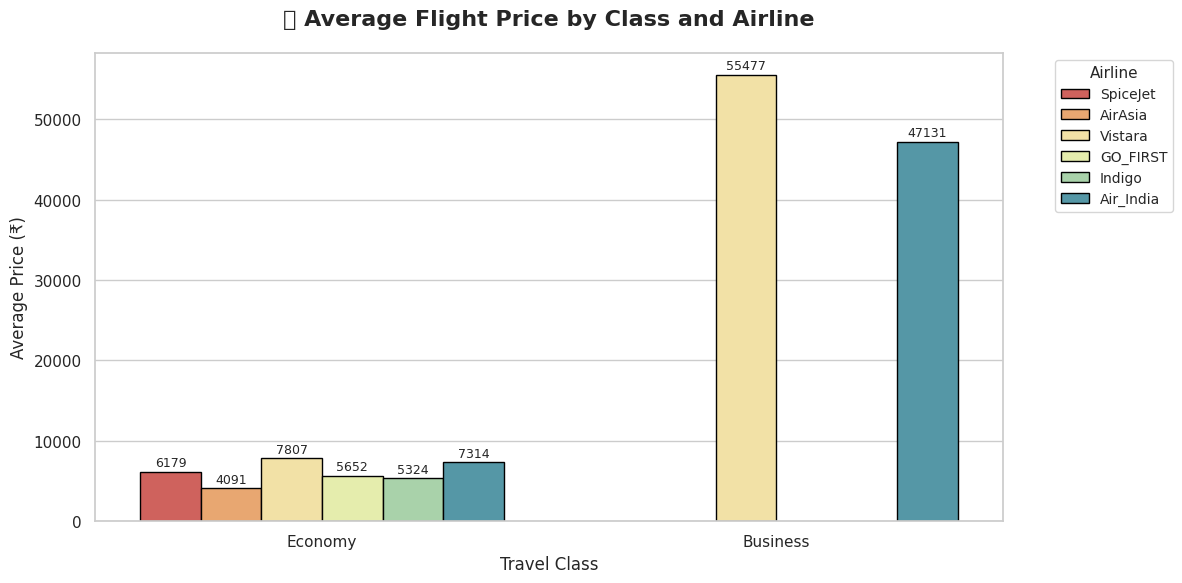

In [ ]:
plt.figure(figsize=(12,6))
sns.set_theme(style="whitegrid")

# Create the barplot
bar = sns.barplot(
    x='class',
    y='price',
    hue='airline',
    data=df,
    estimator=np.mean,
    palette='Spectral',   # Try 'coolwarm', 'viridis', 'mako', 'crest' etc.
    edgecolor='black',
    errorbar=None          # Removes confidence interval bars for a cleaner look
)

# Add title and labels
plt.title('💺 Average Flight Price by Class and Airline', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Travel Class', fontsize=12)
plt.ylabel('Average Price (₹)', fontsize=12)

# Customize legend
plt.legend(
    title='Airline',
    title_fontsize=11,
    fontsize=10,
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

# Add value labels on top of each bar
for container in bar.containers:
    bar.bar_label(container, fmt='%.0f', label_type='edge', fontsize=9, padding=2)

# Style tweaks
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()



<Axes: xlabel='days_left', ylabel='price'>

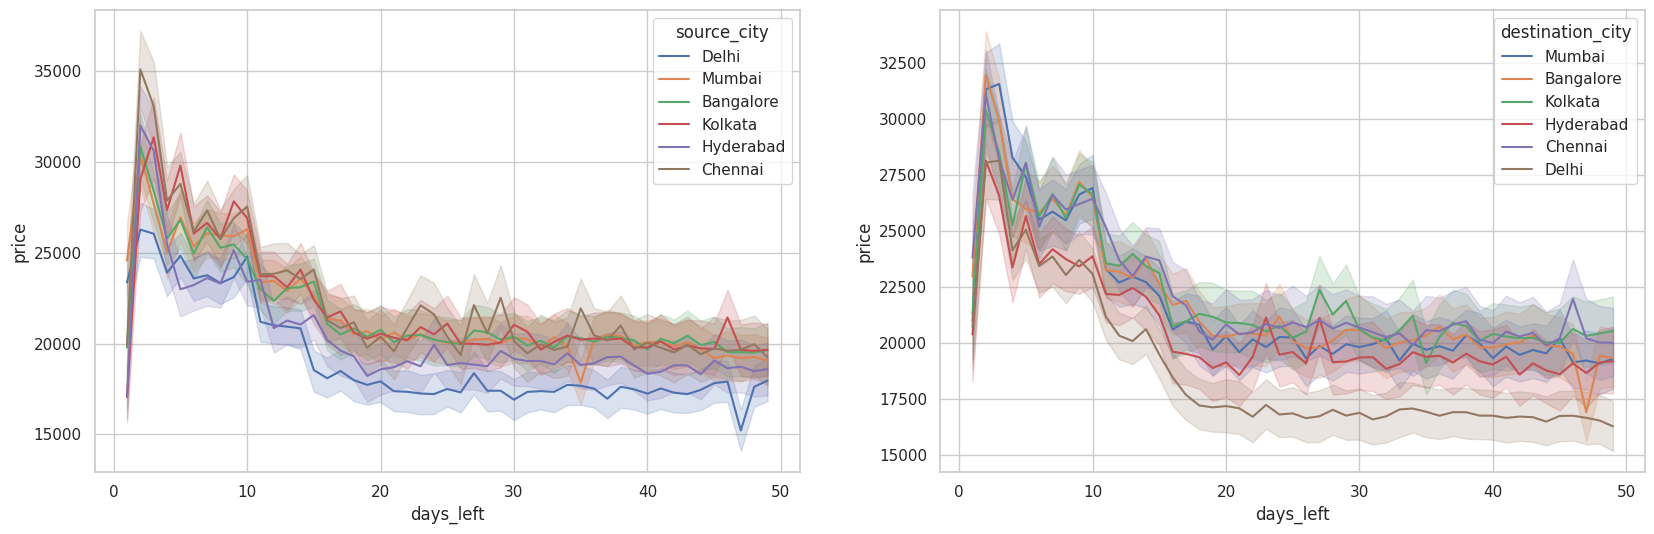

In [ ]:
fig,ax=plt.subplots(1,2,figsize=(20,6))
sns.lineplot(x='days_left',y='price',data=df,hue='source_city',ax=ax[0])
sns.lineplot(x='days_left',y='price',data=df,hue='destination_city',ax=ax[1])


In [ ]:
df['airline'].value_counts()

,count
airline,
Vistara,127859
Air_India,80892
Indigo,43120
GO_FIRST,23173
AirAsia,16098
SpiceJet,9011


/tmp/ipython-input-1630685327.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='airline', data=df, palette=palette, edgecolor='black')
/tmp/ipython-input-1630685327.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='source_city', data=df, palette='viridis', edgecolor='black')
/tmp/ipython-input-1630685327.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='departure_time', data=df, palette='mako', edgecolor='black')
/tmp/ipython-input-1630685327.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is depreca

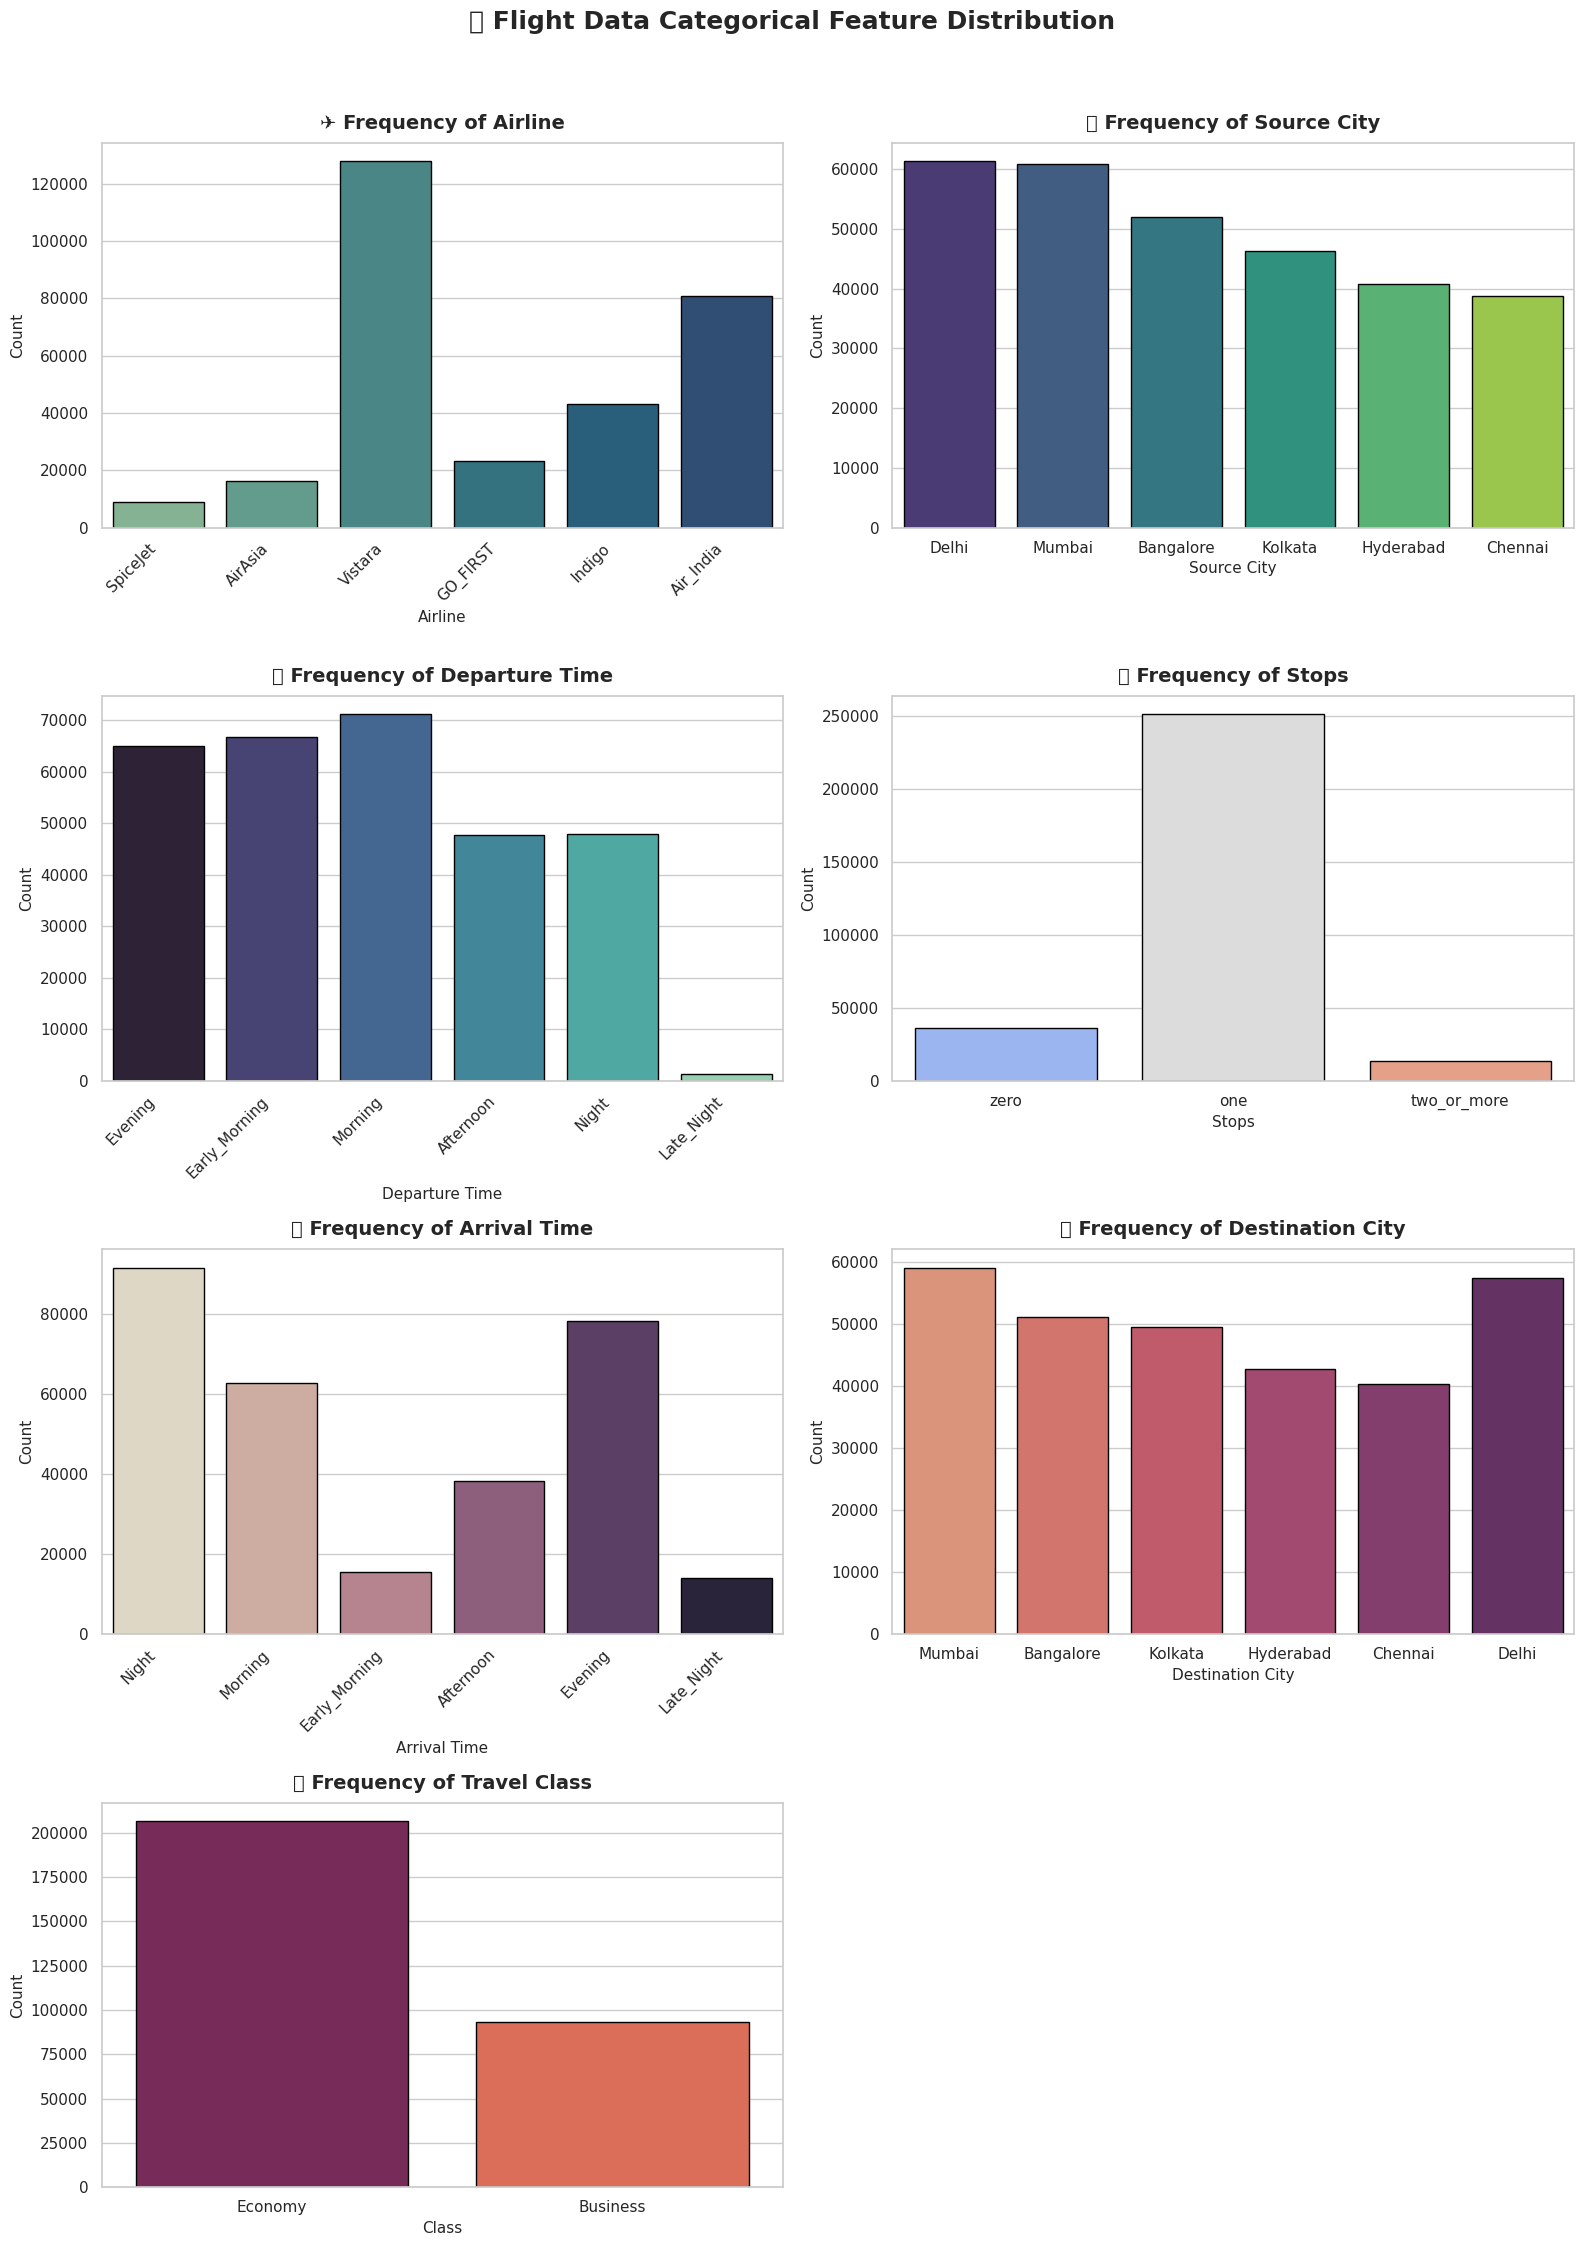

In [ ]:
# Set theme and style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(16,22))

# Define consistent color palette
palette = sns.color_palette("crest")

# 1️⃣ Airline
plt.subplot(4,2,1)
sns.countplot(x='airline', data=df, palette=palette, edgecolor='black')
plt.title("✈️ Frequency of Airline", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Airline", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.xticks(rotation=45, ha='right')

# 2️⃣ Source City
plt.subplot(4,2,2)
sns.countplot(x='source_city', data=df, palette='viridis', edgecolor='black')
plt.title("🌆 Frequency of Source City", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Source City", fontsize=11)
plt.ylabel("Count", fontsize=11)

# 3️⃣ Departure Time
plt.subplot(4,2,3)
sns.countplot(x='departure_time', data=df, palette='mako', edgecolor='black')
plt.title("🕒 Frequency of Departure Time", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Departure Time", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.xticks(rotation=45, ha='right')

# 4️⃣ Stops
plt.subplot(4,2,4)
sns.countplot(x='stops', data=df, palette='coolwarm', edgecolor='black')
plt.title("🛑 Frequency of Stops", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Stops", fontsize=11)
plt.ylabel("Count", fontsize=11)

# 5️⃣ Arrival Time
plt.subplot(4,2,5)
sns.countplot(x='arrival_time', data=df, palette='ch:s=-.2,r=.6', edgecolor='black')
plt.title("🕔 Frequency of Arrival Time", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Arrival Time", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.xticks(rotation=45, ha='right')

# 6️⃣ Destination City
plt.subplot(4,2,6)
sns.countplot(x='destination_city', data=df, palette='flare', edgecolor='black')
plt.title("🎯 Frequency of Destination City", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Destination City", fontsize=11)
plt.ylabel("Count", fontsize=11)

# 7️⃣ Travel Class
plt.subplot(4,2,7)
sns.countplot(x='class', data=df, palette='rocket', edgecolor='black')
plt.title("💺 Frequency of Travel Class", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Class", fontsize=11)
plt.ylabel("Count", fontsize=11)

# Adjust layout and spacing
plt.suptitle("📊 Flight Data Categorical Feature Distribution",fontsize=18, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
col=['airline','source_city','departure_time','stops','arrival_time','destination_city','class']
for i in col:
  df[i]=le.fit_transform(df[i])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  int64  
 1   flight            300153 non-null  object 
 2   source_city       300153 non-null  int64  
 3   departure_time    300153 non-null  int64  
 4   stops             300153 non-null  int64  
 5   arrival_time      300153 non-null  int64  
 6   destination_city  300153 non-null  int64  
 7   class             300153 non-null  int64  
 8   duration          300153 non-null  float64
 9   days_left         300153 non-null  int64  
 10  price             300153 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 25.2+ MB


In [ ]:
df.head(5)

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,4,SG-8709,2,2,2,5,5,1,2.17,1,5953
1,4,SG-8157,2,1,2,4,5,1,2.33,1,5953
2,0,I5-764,2,1,2,1,5,1,2.17,1,5956
3,5,UK-995,2,4,2,0,5,1,2.25,1,5955
4,5,UK-963,2,4,2,4,5,1,2.33,1,5955


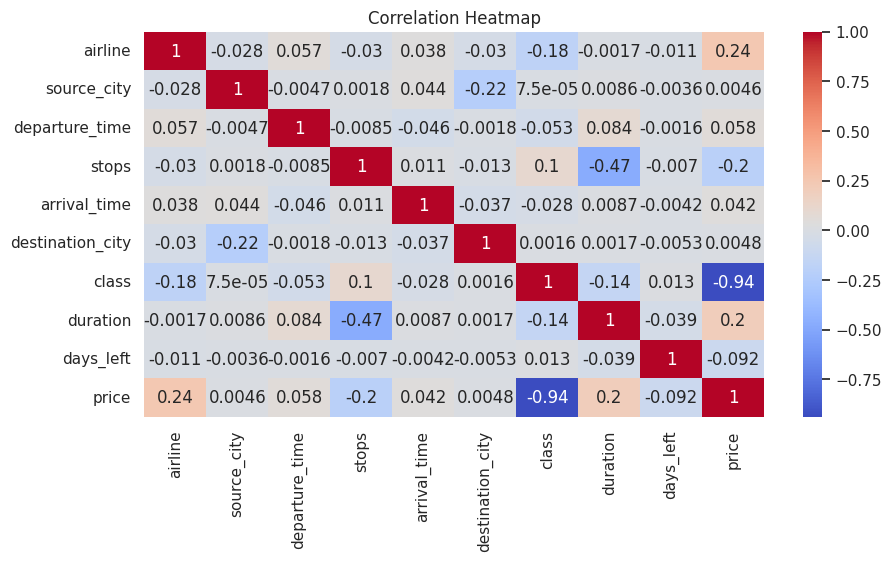

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
col_list=[]
for col in df.columns:
  if((df[col].dtype !='object') & (col != 'price')):
    col_list.append(col)
X=df[col_list]
vif_data=pd.DataFrame()
vif_data['feature']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i)for i in range(len(X.columns))]
print(vif_data)


            feature       VIF
0           airline  3.393124
1       source_city  2.927766
2    departure_time  2.779427
3             stops  1.426614
4      arrival_time  3.684550
5  destination_city  2.885337
6             class  2.849370
7          duration  4.113876
8         days_left  3.976790


In [ ]:
X=df.drop(columns=['flight','price'])
y=df['price']

In [ ]:
X

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
0,4,2,2,2,5,5,1,2.17,1
1,4,2,1,2,4,5,1,2.33,1
2,0,2,1,2,1,5,1,2.17,1
3,5,2,4,2,0,5,1,2.25,1
4,5,2,4,2,4,5,1,2.33,1
...,...,...,...,...,...,...,...,...,...
300148,5,1,4,0,2,3,0,10.08,49
300149,5,1,0,0,5,3,0,10.42,49
300150,5,1,1,0,5,3,0,13.83,49
300151,5,1,1,0,2,3,0,10.00,49


In [ ]:
y

,price
0,5953
1,5953
2,5956
3,5955
4,5955
...,...
300148,69265
300149,77105
300150,79099
300151,81585


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [ ]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
difference=pd.DataFrame(np.c_[y_test,y_pred],columns=['Actual_value','Predicted_value'])
difference

,Actual_value,Predicted_value
0,7366.0,4572.477222
1,64831.0,52809.226907
2,6195.0,7857.626650
3,60160.0,56096.253996
4,6578.0,6656.438105
...,...,...
60026,5026.0,5820.248216
60027,3001.0,486.438325
60028,6734.0,5837.956605
60029,5082.0,-1555.511279


In [ ]:
from sklearn.metrics import *

In [ ]:
r2_core=r2_score(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=root_mean_squared_error(y_test,y_pred)
print(f"r2 score:{r2_core}")
print(f"mean_absolute_error:{MAE}")
print(f"mean_absolute_percentage_error:{MAPE}")
print(f"mean_squared_error:{MSE}")
print(f"root_mean_squared_error:{RMSE}")

r2 score:0.9045526175497736
mean_absolute_error:4627.355215760303
mean_absolute_percentage_error:0.43614483147133226
mean_squared_error:49201433.71164047
root_mean_squared_error:7014.373365571615


/tmp/ipython-input-3128516201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
/tmp/ipython-input-3128516201.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted')


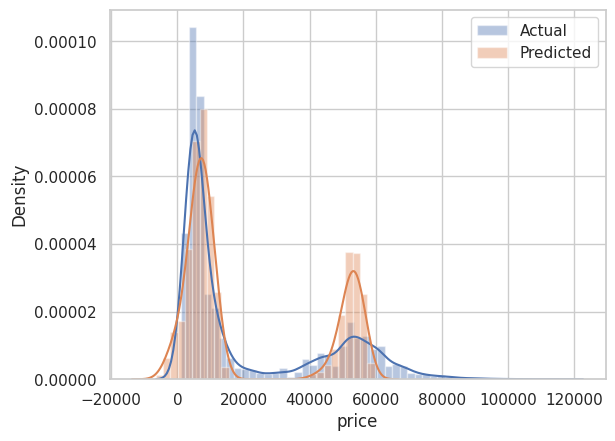

In [ ]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()

Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [ ]:
y_pred=dt.predict(X_test)

In [ ]:
r2_core=r2_score(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=root_mean_squared_error(y_test,y_pred)
print(f"r2 score:{r2_core}")
print(f"mean_absolute_error:{MAE}")
print(f"mean_absolute_percentage_error:{MAPE}")
print(f"mean_squared_error:{MSE}")
print(f"root_mean_squared_error:{RMSE}")

r2 score:0.9723098289403572
mean_absolute_error:1305.9667699466388
mean_absolute_percentage_error:0.08468010725850886
mean_squared_error:14273792.333335645
root_mean_squared_error:3778.0672748557095


/tmp/ipython-input-3128516201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
/tmp/ipython-input-3128516201.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted')


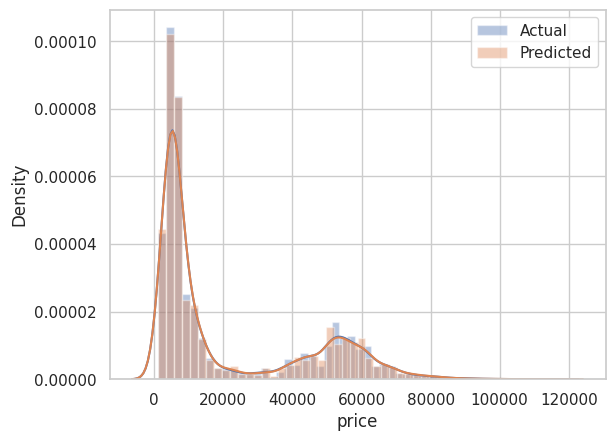

In [ ]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()

In [ ]:
rfr.fit(X_train,y_train)


RandomForestRegressor()

In [ ]:
y_pred=rfr.predict(X_test)

In [ ]:
r2_core=r2_score(y_test,y_pred)
MAE=mean_absolute_error(y_test,y_pred)
MAPE=mean_absolute_percentage_error(y_test,y_pred)
MSE=mean_squared_error(y_test,y_pred)
RMSE=root_mean_squared_error(y_test,y_pred)
print(f"r2 score:{r2_core}")
print(f"mean_absolute_error:{MAE}")
print(f"mean_absolute_percentage_error:{MAPE}")
print(f"mean_squared_error:{MSE}")
print(f"root_mean_squared_error:{RMSE}")

r2 score:0.9826915616672274
mean_absolute_error:1193.227557668551
mean_absolute_percentage_error:0.07804385994336084
mean_squared_error:8922193.14370424
root_mean_squared_error:2987.004041460982


/tmp/ipython-input-3128516201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test,label='Actual')
/tmp/ipython-input-3128516201.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred,label='Predicted')


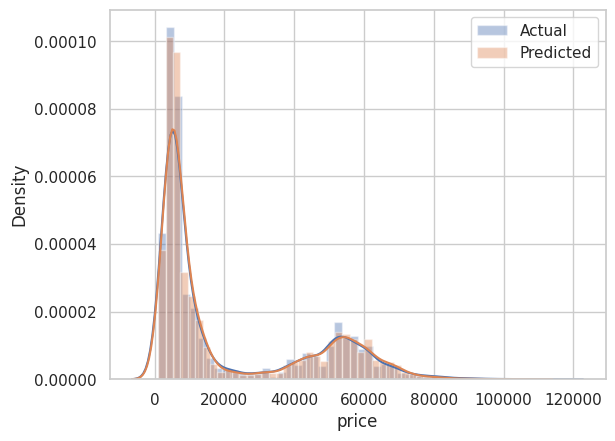

In [ ]:
sns.distplot(y_test,label='Actual')
sns.distplot(y_pred,label='Predicted')
plt.legend()